# Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0.00000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.00000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.00000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.00000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.00000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.045270,0.000000,11.930000,0.00000,0.573000,6.120000,76.700000,2.287500,1.000000,273.000000,21.000000,396.900000,9.080000,20.600000
503,0.060760,0.000000,11.930000,0.00000,0.573000,6.976000,91.000000,2.167500,1.000000,273.000000,21.000000,396.900000,5.640000,23.900000
504,0.109590,0.000000,11.930000,0.00000,0.573000,6.794000,89.300000,2.388900,1.000000,273.000000,21.000000,393.450000,6.480000,22.000000
505,0.047410,0.000000,11.930000,0.00000,0.573000,6.030000,80.800000,2.505000,1.000000,273.000000,21.000000,396.900000,7.880000,11.900000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     507 non-null    float64
 4   NOX      507 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    float64
 9   TAX      507 non-null    float64
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(14)
memory usage: 55.6 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,507.000000,507.000000,507.000000,507.000000,502.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.593041,23.299396,6.853571,0.253743,0.115763,0.704882,28.121033,2.103628,8.698651,168.370495,2.162805,91.204607,7.134002,9.188012
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082100,0.000000,5.190000,0.000000,0.449000,5.884250,45.050000,2.100350,4.000000,279.000000,17.400000,375.270000,6.970000,17.050000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208500,77.300000,3.215700,5.000000,330.000000,19.000000,391.430000,11.380000,21.200000
75%,3.675945,12.500000,18.100000,0.000000,0.624000,6.623500,94.050000,5.164950,24.000000,666.000000,20.200000,396.220000,16.950000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


MEDV is the price

## Lokking for Correlations

In [6]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [7]:
from pandas.plotting import scatter_matrix

In [8]:
attributes = ['RM', 'MEDV', 'CHAS', 'LSTAT', 'PTRATIO']

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='CHAS', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='CHAS', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='CHAS'>,
        <Axes: xlabel='MEDV', ylabel='CHAS'>,
        <Axes: xlabel='CHAS', ylabel='CHAS'>,
        <Axes: xlabel='LSTAT', ylabel='CHAS'>,
        <Axes: xlabel='PTRATIO', ylabel='CHAS'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='CHAS', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='PTRATIO', ylabel='LSTAT'>],
       [<Axes: xlabel='RM', ylabel='PTRATIO'>,
        <Axes: xlabel='MED

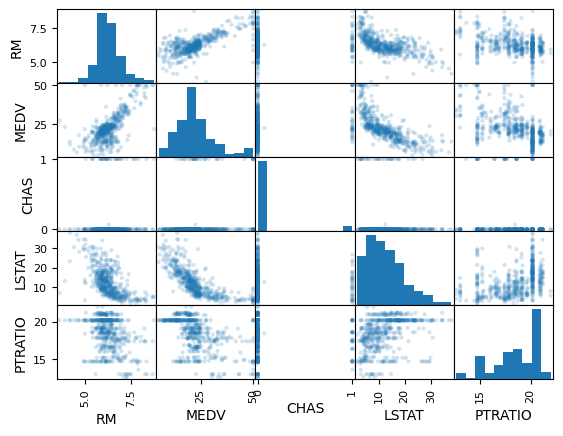

In [9]:
scatter_matrix(df[attributes], alpha=0.2)

<Axes: xlabel='RM', ylabel='MEDV'>

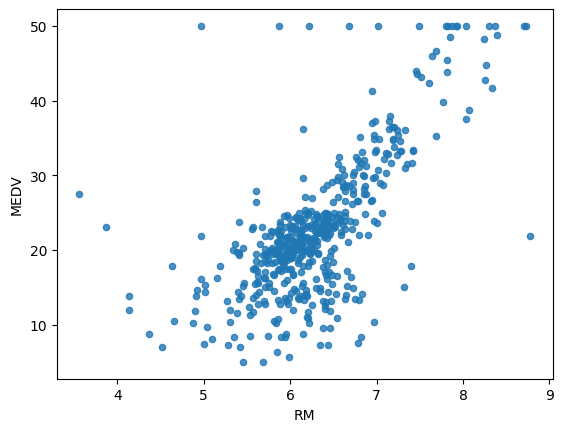

In [10]:
df.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

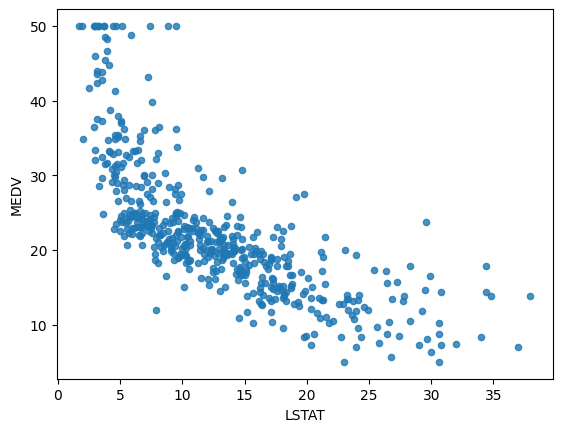

In [11]:
df.plot(kind='scatter', x='LSTAT', y='MEDV', alpha=0.8)

## Fixing Missing Attributes

In [12]:
df['RM'].fillna(df['RM'].median)

0         6.575
1         6.421
2         7.185
3         6.998
4         7.147
         ...   
502        6.12
503       6.976
504       6.794
505        6.03
506    6.284341
Name: RM, Length: 507, dtype: object

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='median')

In [15]:
imputer.fit(df)

SimpleImputer(strategy='median')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     507 non-null    float64
 4   NOX      507 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    float64
 9   TAX      507 non-null    float64
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(14)
memory usage: 55.6 KB


In [17]:
imputer.statistics_.shape

(14,)

In [18]:
housing = imputer.transform(df)

In [19]:
housing = pd.DataFrame(housing, columns=df.columns)

In [20]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0.00000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.00000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.00000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.00000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.00000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.045270,0.000000,11.930000,0.00000,0.573000,6.120000,76.700000,2.287500,1.000000,273.000000,21.000000,396.900000,9.080000,20.600000
503,0.060760,0.000000,11.930000,0.00000,0.573000,6.976000,91.000000,2.167500,1.000000,273.000000,21.000000,396.900000,5.640000,23.900000
504,0.109590,0.000000,11.930000,0.00000,0.573000,6.794000,89.300000,2.388900,1.000000,273.000000,21.000000,393.450000,6.480000,22.000000
505,0.047410,0.000000,11.930000,0.00000,0.573000,6.030000,80.800000,2.505000,1.000000,273.000000,21.000000,396.900000,7.880000,11.900000


In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     507 non-null    float64
 4   NOX      507 non-null    float64
 5   RM       507 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    float64
 9   TAX      507 non-null    float64
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(14)
memory usage: 55.6 KB


In [22]:
housing['RM']

0      6.575000
1      6.421000
2      7.185000
3      6.998000
4      7.147000
         ...   
502    6.120000
503    6.976000
504    6.794000
505    6.030000
506    6.284341
Name: RM, Length: 507, dtype: float64

## Train Test Splitting

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
train_set, test_set = train_test_split(housing, test_size=0.2, shuffle=True)

In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 466 to 235
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     405 non-null    float64
 1   ZN       405 non-null    float64
 2   INDUS    405 non-null    float64
 3   CHAS     405 non-null    float64
 4   NOX      405 non-null    float64
 5   RM       405 non-null    float64
 6   AGE      405 non-null    float64
 7   DIS      405 non-null    float64
 8   RAD      405 non-null    float64
 9   TAX      405 non-null    float64
 10  PTRATIO  405 non-null    float64
 11  B        405 non-null    float64
 12  LSTAT    405 non-null    float64
 13  MEDV     405 non-null    float64
dtypes: float64(14)
memory usage: 47.5 KB


In [26]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 11 to 393
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    float64
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    float64
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(14)
memory usage: 12.0 KB


## Creating a Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
myPipeLine = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('Std_Scalar', StandardScaler())
])

In [29]:
housing_tr = housing.drop('MEDV', axis=1)
housing_num_tr = myPipeLine.fit_transform(housing_tr)
np.set_printoptions(suppress=True)
print(housing)
print(housing_num_tr)

         CRIM         ZN      INDUS     CHAS       NOX        RM        AGE  \
0    0.006320  18.000000   2.310000  0.00000  0.538000  6.575000  65.200000   
1    0.027310   0.000000   7.070000  0.00000  0.469000  6.421000  78.900000   
2    0.027290   0.000000   7.070000  0.00000  0.469000  7.185000  61.100000   
3    0.032370   0.000000   2.180000  0.00000  0.458000  6.998000  45.800000   
4    0.069050   0.000000   2.180000  0.00000  0.458000  7.147000  54.200000   
..        ...        ...        ...      ...       ...       ...        ...   
502  0.045270   0.000000  11.930000  0.00000  0.573000  6.120000  76.700000   
503  0.060760   0.000000  11.930000  0.00000  0.573000  6.976000  91.000000   
504  0.109590   0.000000  11.930000  0.00000  0.573000  6.794000  89.300000   
505  0.047410   0.000000  11.930000  0.00000  0.573000  6.030000  80.800000   
506  3.613524  11.363636  11.136779  0.06917  0.554695  6.284341  68.574901   

          DIS       RAD         TAX    PTRATIO     

In [30]:
housing_labels = housing['MEDV'].to_numpy()
print(housing_labels)

[24.         21.6        34.7        33.4        36.2        28.7
 22.9        27.1        16.5        18.9        15.         18.9
 21.7        20.4        18.2        19.9        23.1        17.5
 20.2        18.2        13.6        19.6        15.2        14.5
 15.6        13.9        16.6        14.8        18.4        21.
 12.7        14.5        13.2        13.1        13.5        18.9
 20.         21.         24.7        30.8        34.9        26.6
 25.3        24.7        21.2        19.3        20.         16.6
 14.4        19.4        19.7        20.5        25.         23.4
 18.9        35.4        24.7        31.6        23.3        19.6
 18.7        16.         22.2        25.         33.         23.5
 19.4        22.         17.4        20.9        24.2        21.7
 22.8        23.4        24.1        21.4        20.         20.8
 21.2        20.3        28.         23.9        24.8        22.9
 23.9        26.6        22.5        22.2        23.6        28.7
 22.6      

In [31]:
housing_num_tr.shape

(507, 13)

## Selecting and training model
There are Three models for regression primarily
1. Linear Regression
2. Decision Tree Regression
3. Random Forset Regressor

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model1 = LinearRegression()
model1.fit(housing_num_tr, housing_labels)

model2 = DecisionTreeRegressor()
model2.fit(housing_num_tr, housing_labels)

model3 = RandomForestRegressor()
model3.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [33]:
someData = housing_tr.iloc[:5]

In [34]:
some_labels = housing_labels[:5]

In [35]:
prepared_data = myPipeLine.transform(someData)

In [36]:
print(someData)
print(df.iloc[:5])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.

In [37]:
some_labels

array([24. , 21.6, 34.7, 33.4, 36.2])

In [38]:
model1.predict(prepared_data)

array([29.99663677, 25.04304813, 30.57188706, 28.61786874, 27.9540908 ])

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
housing_prediction_lr = model1.predict(housing_num_tr)
housing_prediction_dt = model2.predict(housing_num_tr)
housing_prediction_rfr = model3.predict(housing_num_tr)

In [41]:
lin_mse = mean_squared_error(housing_labels, housing_prediction_lr)
lin_rmse = np.sqrt(lin_mse)

In [42]:
print(lin_mse)
print(lin_rmse)

21.89805056643884
4.679535293855453


In [43]:
dt_mse = mean_squared_error(housing_labels, housing_prediction_dt)
dt_rmse = np.sqrt(dt_mse)

In [44]:
print(dt_mse)
print(dt_rmse)

0.0
0.0


In [45]:
rfr_mse = mean_squared_error(housing_labels, housing_prediction_rfr)
rfr_rmse = np.sqrt(rfr_mse)

In [46]:
print(rfr_mse)
print(rfr_rmse)

1.3713035154910476
1.1710266929028763


## Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
scores_lin = cross_val_score(model1, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
scores_dt = cross_val_score(model2, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
scores_rfr = cross_val_score(model3, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [48]:
rmse_scores_lin = np.sqrt(-scores_lin)
rmse_scores_dt = np.sqrt(-scores_dt)
rmse_scores_rfr = np.sqrt(-scores_rfr)

In [49]:
rmse_scores_lin

array([ 3.06422642,  3.80114693,  3.75192676,  5.94236772,  5.65601244,
        4.46517679,  3.11396553, 13.1094872 ,  5.88764607,  3.31551094])

In [50]:
rmse_scores_dt

array([4.07762907, 3.36113893, 3.69886045, 6.76939479, 4.89771856,
       5.81881667, 3.06789737, 9.57777636, 8.12336137, 5.22907161])

In [51]:
rmse_scores_rfr

array([3.28926584, 2.41275194, 2.2398412 , 4.6699718 , 3.35330405,
       5.09395279, 2.68542413, 9.750817  , 5.4634024 , 3.86444262])

In [52]:
def printScores(scores):
    print('Scores ',scores)
    print('Mean Of Scores ',scores.mean())
    print('STD Of Scores ',scores.std())

In [53]:
printScores(rmse_scores_lin)

Scores  [ 3.06422642  3.80114693  3.75192676  5.94236772  5.65601244  4.46517679
  3.11396553 13.1094872   5.88764607  3.31551094]
Mean Of Scores  5.210746680201219
STD Of Scores  2.8433920932395362


In [54]:
printScores(rmse_scores_dt)

Scores  [4.07762907 3.36113893 3.69886045 6.76939479 4.89771856 5.81881667
 3.06789737 9.57777636 8.12336137 5.22907161]
Mean Of Scores  5.462166518565842
STD Of Scores  2.0347534536555827


In [55]:
printScores(rmse_scores_rfr)

Scores  [3.28926584 2.41275194 2.2398412  4.6699718  3.35330405 5.09395279
 2.68542413 9.750817   5.4634024  3.86444262]
Mean Of Scores  4.28231737733366
STD Of Scores  2.1059289218812216


Random Forest Regressor is The best of all
1. Random Forest Regressor
2. decision tree regressor
3. Linear Regression

## Pickling the model

In [56]:
import pickle as pkl

In [57]:
with open('model.pkl', 'wb') as op:
    testModel = pkl.dump(model3, op)

## Running Final Tests on the Model

In [58]:
test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,11.66,29.8
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54,23.4
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31,15.6
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3
301,0.03537,34.0,6.09,0.0,0.433,6.590,40.4,5.4917,7.0,329.0,16.1,395.75,9.50,22.0


In [59]:
x_test = test_set.drop('MEDV', axis=1)
y_test = test_set['MEDV'].copy()

In [60]:
x_prepared = myPipeLine.transform(x_test)

In [61]:
with open('model.pkl', 'rb') as op:
    testModel = pkl.load(op)

In [62]:
testModel

RandomForestRegressor()

In [63]:
final_predictions = testModel.predict(x_prepared)

In [64]:
final_predictions

array([19.72      , 31.295     , 28.078     , 23.655     , 29.736     ,
       22.631     , 22.011     ,  8.182     , 18.114     , 27.525     ,
       30.868     , 31.759     , 21.707     , 26.203     , 20.502     ,
       27.044     , 19.774     , 25.017     , 27.909     , 14.294     ,
       43.362     , 23.43      , 22.12532806, 24.441     , 19.37      ,
       23.22      , 19.336     ,  8.938     , 17.127     , 12.796     ,
       19.195     , 17.292     , 40.578     , 33.046     , 18.133     ,
       24.23      , 20.176     , 18.184     , 19.13      , 29.261     ,
       20.883     , 16.702     , 31.253     , 18.384     , 23.023     ,
       46.761     , 26.433     , 22.065     , 32.12      ,  8.02      ,
       14.214     , 14.738     , 42.78      , 19.553     , 21.185     ,
        8.814     , 21.96899604, 19.407     , 17.423     , 23.283     ,
       18.854     , 24.156     , 13.626     , 25.027     , 15.867     ,
       19.907     , 13.396     , 24.732     , 31.561     , 10.92

In [65]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [66]:
final_mse

1.77712876223203

In [67]:
final_rmse

1.3330899302867867

In [68]:
final_scores = cross_val_score(testModel, x_prepared, y_test, scoring='neg_mean_squared_error', cv=10)
final_rmse_scores = np.sqrt(-final_scores)

In [69]:
printScores(final_rmse_scores)

Scores  [2.75404838 6.42223223 3.87817859 3.28038735 7.87205006 3.52140427
 4.05632396 3.294416   3.74168086 5.30889555]
Mean Of Scores  4.412961724204342
STD Of Scores  1.5410936514537166


In [70]:
final_predictions

array([19.72      , 31.295     , 28.078     , 23.655     , 29.736     ,
       22.631     , 22.011     ,  8.182     , 18.114     , 27.525     ,
       30.868     , 31.759     , 21.707     , 26.203     , 20.502     ,
       27.044     , 19.774     , 25.017     , 27.909     , 14.294     ,
       43.362     , 23.43      , 22.12532806, 24.441     , 19.37      ,
       23.22      , 19.336     ,  8.938     , 17.127     , 12.796     ,
       19.195     , 17.292     , 40.578     , 33.046     , 18.133     ,
       24.23      , 20.176     , 18.184     , 19.13      , 29.261     ,
       20.883     , 16.702     , 31.253     , 18.384     , 23.023     ,
       46.761     , 26.433     , 22.065     , 32.12      ,  8.02      ,
       14.214     , 14.738     , 42.78      , 19.553     , 21.185     ,
        8.814     , 21.96899604, 19.407     , 17.423     , 23.283     ,
       18.854     , 24.156     , 13.626     , 25.027     , 15.867     ,
       19.907     , 13.396     , 24.732     , 31.561     , 10.92

In [71]:
y_test

11     18.9
274    32.4
473    29.8
73     23.4
39     30.8
       ... 
134    15.6
505    11.9
121    20.3
301    22.0
393    13.8
Name: MEDV, Length: 102, dtype: float64